## By Jared Ross and Akshay Dadhwal

# Introduction

In the professional world a lot of systems are not built with data science in mind because they are either old or companies did not plan to perform analytics on the data.  To sucessfully gather and analyze data, data sciencetist must work around existing systems that businesses use to gather and store data.  This tutorial will introduce how to process and analyze data from third party business management sites. 

A lot of business applications can output reports so I will be focusing on how to use these reports to successfully get information about the company.  This can be both simple information about the business but also much more advanced machine learning methods can be employed to have a deeper understanding of how the business runs

# Tutorial Content

In this tutorial I will show how to capture some basic metrics about the business operations using Pandas and also more advanced metrics using machine learning libraries

Data will be from <a href = "http://maineventcaterers.com/" title = "Main Event">Main Event Catering</a> which is stored in <a href="http://www.caterxpert.com/caterxpert/caterxpert.html" title="CaterXpert">CaterXpert</a> a business management system made specfically for the catering business.  Many different types of business have systems very similar to this that keep track of all sales and expenses that are relevant to the industry.  

In this tutorial I will go over
<ul>
<li>Libaries</li>
<li>Exporting and processing reports</li>
<li>Basic Metrics</li>
<li>More advanced metrics using machine learning</li>
</ul>

# Libaries

Before getting started we will import all libaries that are needed for this project

In [76]:
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta
from datetime import datetime, timedelta
from dateutil import parser
import glob
import math
import os
import calendar
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Loading Data

With all dependencies loaded I can now begin loading data. The data from CaterXpert is from various Excel document that tells me different parts of the busieness. For this I will download the reports Revenue Projection by AE & Status XLS, Tasting Analysis XLS and Post Schedules Status Report XLS. These reports show information on sales, staffing prices and tastings each a seperate but equally important part of the Catering industry.  Most of the times data about a business will be available from different parts of the buisness and you will rarely have all the information stored in one place.  Knowing how to look at different types of reports and extract key information is imporant since very rarely is there a uniform template used for every report.

In [77]:
#Dataframe for Revenue Projection by AE & Status XLS
df_rev = pd.read_csv(glob.glob('*mecreveproj*')[0],names =['Unnamed 0','Unnamed 1','Unnamed 2','Unnamed 3','Unnamed 4'\
,'Unnamed 5','Unnamed 6','Unnamed 7','Unnamed 8','Unnamed 9','Unnamed 10',\
'Unnamed 11','Unnamed 12','Unnamed 13','Unnamed 14','Unnamed 15'\
,'Unnamed 16','Unnamed 17','Unnamed 18','Unnamed 19','Unnamed 20','Unnamed 21',\
'Unnamed 23','Unnamed 24','Unnamed 25','Unnamed 26','Unnamed 27'\
,'Unnamed 28','Unnamed 29','Unnamed 30','Unnamed 31','Unnamed 32','Unnamed 33',\
'Unnamed 34','Unnamed 35','Unnamed 36','Unnamed 37','Unnamed 38',\
'Unnamed 39','Unnamed 40','Unnamed 41','Unnamed 42','Unnamed 43','Unnamed 44',\
'Test 0','Test 1','Test 2','Test 3','Test 4'\
,'Test 5','Test 6','Test 7','Test 8','Test 9','Test 10',\
'Test 11','Test 12','Test 13','Test 14','Test 15'\
,'Test 16','Test 17','Test 18','Test 19','Test 20','Test 21',\
'Test 23','Test 24','Test 25','Test 26','Test 27'\
,'Test 28','Test 29','Last'])

#Dataframe for Post Schedules Status Report XLS
df_sched = pd.read_csv(glob.glob('*PMpostsched*')[0],names =['Unnamed 0','Unnamed 1','Unnamed 2','Unnamed 3','Unnamed 4',\
'Unnamed 5','Unnamed 6','Unnamed 7','Unnamed 8','Unnamed 9','Unnamed 10','Unnamed 11','Unnamed 12','Unnamed 13'])
#Dataframe for Tasting Analysis XLS
df_tasting = pd.read_excel(glob.glob('*Tasting*')[0])
df_rev[:11]

,Unnamed 0,Unnamed 1,Unnamed 2,Unnamed 3,Unnamed 4,Unnamed 5,Unnamed 6,Unnamed 7,Unnamed 8,Unnamed 9,...,Test 20,Test 21,Test 23,Test 24,Test 25,Test 26,Test 27,Test 28,Test 29,Last
0,REVENUE FORECAST: Main Event Caterers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Event Date Range: 12/17/2015 through 05/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Event Location: all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Event Status: Definite, Tentative",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Account Executive: all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NOTE: Data from highest estimate version - low...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Event Date,CIS #,AE,Definite,Entered By,Entered Date,Customer,Adult Guests,Event Menu,Discount,...,Delivery,Discount,Suggestions & Options,Discount,Our Gift to You!,Discount,Total Discount,State,Subtotal,Sales Tax
9,FOR DEFINITE EVENTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df_sched[:8]


,Unnamed 0,Unnamed 1,Unnamed 2,Unnamed 3,Unnamed 4,Unnamed 5,Unnamed 6,Unnamed 7,Unnamed 8,Unnamed 9,Unnamed 10,Unnamed 11,Unnamed 12,Unnamed 13
0,Post Schedules Status Report,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Main Event Caterers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Event Date Range: 12/17/2015 through 5/10/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Event Status: Definite, Tentative",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Service Status: Bill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Business Unit: all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Event Date,Event #,Event Customer Name,Resource Name,Position Type,Actual Call In,Actual Call Out,Rate,Extra Pay,Tips,Hours,Amount,Status,NaN
7,12/17/2015,10705 T1,Jaxxbaum,"Moreno,Launy (TIPS) (80)",Mkt Event + Tasting Butler,12/17/2015 10:00:00 AM,12/17/2015 2:30:00 PM,20.00,0.00,0.00,4.50,90.00,Confirmed,NaN


In [79]:
df_tasting[:8]

,Tasting Analysis,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,Total,Presign,Lost,Unsign,NaN,NaN,NaN,NaN,Tot Signed,Tot Lost,Tot Tent,Ave Signed,Ave Lost,Ave Tent
1,NaN,NaN,# tast,# tast,Presign,# tast,# sign,# lost,# tent,sign ave,Event Value,Event Value,Event Value,Event Value,Event Value,Event Value
2,2015.0,July,31,9,1,22,10,12,0,45.4545,166220,225264,0,16622,18772,NaN
3,NaN,Aug,25,11,1,14,11,4,0,78.5714,198198,59560,0,18018,14890,NaN
4,NaN,Sep,25,7,0,18,15,3,0,83.3333,335655,52359,0,22377,17453,NaN
5,NaN,Oct,25,7,0,18,15,3,0,83.3333,319335,46098,0,21289,15366,NaN
6,NaN,Nov,26,9,0,17,15,2,0,88.2353,246075,40468,0,16405,20234,NaN
7,NaN,Dec,20,5,0,15,14,1,0,93.3333,241584,10988,0,17256,10988,NaN


How CaterXpert outputs data there is a long string of unique numbers to identify different reports like for Revenue the file name is 828251485418541212852mecreveprojbyae while for schedules it is MAINEVENT309104102017125831830PMpostschedulesstatus.net.  To compensate this I use the plugin glob which uses regex to select files that match the regex.  This is helpful since you may have multiple versions of the same file for different reports to capture new data so you dont have to change the file name everytime.

Another thing is because of the header you have to make room for the extra columns that actually diferentiate the data since it intially only makes room for 1 out of the total 75 columns for Revenue Projections which gives the error "CParserError: Error tokenizing data. C error: Expected 1 fields in line 9, saw 75"  Thats why I make temporay column names to read in the data intially. 

Now that the data is read in I want to get rid of the headers and change column names to be the correct information which I wrote a function that works for most of the reports. The ones that the function doesn't work for I have to customisze how to find the headers.

In [80]:
def find_start(df):
    for i, r in df.iterrows():
        if not pd.isnull(r[1]):
            return i

def resetColName(df):
        #finds where the data starts and drops the header rows
        df.drop(df.index[:find_start(df)],inplace= True)
        df = df.reset_index(drop=True)
        df.columns = df.iloc[0]
        #sets the column names in the dataframe and then drops them
        df.drop(df.index[0], inplace = True)
        df = df.reset_index(drop=True)
        #drops row with definitive
        df.drop(df.index[0],inplace = True)
        return df
    


To start we want to find the start of the column.  The headers only take up one column so to check where the actaul columns start it is the first non null value of any other row. Once the columns are found it is just a matter of setting the column names to the first row and reseting the index so that the next line is now the start of the data.  This process is important because many times reports have filler information at the top to make it more human readable however it causes the data to not be just read with pd.read_csv

There is also information on tentative events that I do not want to include so I find the index of these TENTATIVE EVENTS and drop any events that appear after the index.

I finally fill any empty columns for Subtotal and Adult Guests with 0's.  This is important because when you want to some null values won't affect the outcome.

In [81]:
df_rev = resetColName(df_rev)
index = df_rev[df_rev['Event Date'] == 'FOR TENTATIVE EVENTS'].index[0]
df_rev.drop(df_rev.index[index-2:],inplace = True)
df_sched = resetColName(df_sched)
df_rev['Adult Guests'] = df_rev['Adult Guests'].fillna(0)
df_rev[' Subtotal'] = df_rev[' Subtotal'].fillna(0)


Tasting excel is a little differently formatted so data has to be reformatted differently.  First since the columns names occupy two different lines it is just easier to hard code the names then try and parse it automatically.  That's another important thing of figuring out when it's better to just enter the data instead of finding an automatic way by looking at the time invested into figuring out a solution versus the need down the road to change code to reflect changes.

In [82]:
df_tasting.drop(df_tasting.index[:find_start(df_tasting)],inplace = True)
df_tasting = df_tasting.reset_index(drop = True)
#have to hard code names because collumns in report are across two lines
df_tasting.columns = ['Year','Month and Year','Total Tastings','Presign Number', 'Presign Lost', 'Unsign Number', 'Unsign Signed', \
'Unsigned Lost', 'Unsign Tentative','Sign Ave','Total Signed Event Value',\
'Total Lost Event Value', 'Total Tentative Event Value','Ave Signed Event Value','Ave Lost Event Value','Ave Tent Event Value']
df_tasting = df_tasting[df_tasting['Month and Year'] != 'Totals/Ave']
#drop empty months
df_tasting = df_tasting.dropna(subset=['Month and Year'])
year = 0
#goes through the dataframe
for i, r in df_tasting.iterrows():
    #checks if the year tab is null and if not set that as the current year
    if not math.isnan(r['Year']):
        temp = int(str(r['Year'])[:4])
        #makes the month tab hold both the month and year
    df_tasting.loc[i,'Month and Year'] = parser.parse(r['Month and Year']).replace(year = temp, day = 1)
#drops the year tab since month keeps track of it
df_tasting = df_tasting.drop('Year', axis=1)
df_tasting.head()

,Month and Year,Total Tastings,Presign Number,Presign Lost,Unsign Number,Unsign Signed,Unsigned Lost,Unsign Tentative,Sign Ave,Total Signed Event Value,Total Lost Event Value,Total Tentative Event Value,Ave Signed Event Value,Ave Lost Event Value,Ave Tent Event Value
0,2015-07-01 00:00:00,31,9,1,22,10,12,0,45.4545,166220,225264,0,16622,18772,NaN
1,2015-08-01 00:00:00,25,11,1,14,11,4,0,78.5714,198198,59560,0,18018,14890,NaN
2,2015-09-01 00:00:00,25,7,0,18,15,3,0,83.3333,335655,52359,0,22377,17453,NaN
3,2015-10-01 00:00:00,25,7,0,18,15,3,0,83.3333,319335,46098,0,21289,15366,NaN
4,2015-11-01 00:00:00,26,9,0,17,15,2,0,88.2353,246075,40468,0,16405,20234,NaN


Since there is two different columns to keep track of the dates I have to combine the dates to turn it into one column with datetime objects to allow for easy manipulation of the data.  I do this by iterrating through the rows.  Everytime I see a non-null value I know this is a date.  I then add the year the year to the month as a string and use a plugin called parser which recieves a string in different formats and turns it into a datetime object.  This is helpful because dates take many different formats and this makes it a quick and automatic process that can create datetime objects.


# Basic Metrics

Now that we have access to the data we can begin trying to get some information from the data.  To start we we will look at some simple metrics.  The first thing to do is to make any columns with dates into datetime objects so we can use them to gather data on certain date ranges and make subtotal a float so it can be added.  This is a very simple but important metric for businesses.  Being able to see money made, customer served and many other metrics  over a peroid of time can give a business insight into its operations.

To start I turn all the fields that we want to manipulate into the correct type because everything is a string initially

In [83]:
df_rev['Event Date'] = pd.to_datetime(df_rev['Event Date'])
df_sched['Event Date'] = pd.to_datetime(df_sched['Event Date'])
df_rev['Definite'] = pd.to_datetime(df_rev['Definite'])
df_rev[' Subtotal'] = df_rev[' Subtotal'].astype(float)
df_rev['Adult Guests'] = df_rev['Adult Guests'].astype(int)
df_rev[' Event Personnel'] = df_rev[' Event Personnel'].astype(float)
df_sched['Amount'] = df_sched['Amount'].str.replace(',','')
df_sched['Amount'] = df_sched['Amount'].astype(float)

To start we will get a simple count of all the events and the money they made within a certain time peroid from the revenue spreadsheet.  

In [84]:
EventDollars = df_rev[df_rev['Event Date'].between('4/5/17','4/11/17')][' Subtotal'].sum()
#gets event # executed from dates in textbox
EventCount = df_rev[df_rev['Event Date'].between('4/5/17','4/11/17')]['Event Date'].count()
Guests = df_rev[df_rev['Event Date'].between('4/5/17','4/11/17')]['Adult Guests'].sum()
#gets avg check
print("Guests:"+str(Guests))

AvgCheck = EventDollars/Guests
print("Event Money:"+str(EventDollars))
print("Event Count:"+str(EventCount))
print("Average Check:"+str(AvgCheck))

Guests:3727
Event Money:173169.63000000003
Event Count:25
Average Check:46.4635444057


For a slightly more complicated metric we will look at the staff profit using two different sheets.  One of the sheets holds data on how much the staffing costs for events in the time frame while the other keeps track of how much they make for the company.  This type of metric is important because many time different data is spread across different reports.  For many businesses it doesn't just matter what happened in one aspect of business but how that is affecting all of the business.  To combine data there has to be some overlap in data.  For this spreadsheet we are using date because we are looking at a range not specific events.  However if we wanted to look at events we could combine instead on event number.  

In [85]:
# gets staff charges
staffCharges  = df_rev[df_rev['Event Date'].between('4/5/17','4/11/17')][' Event Personnel'].sum()
#narrows the dataframe to only include dates we want
df_sched = df_sched[df_sched['Event Date'].between('4/5/17','4/11/17')]
#gets rid of any position type we dont want
df_sched = df_sched[(df_sched['Position Type'] != 'Mkt Event + Tasting Butler') & (df_sched['Position Type'] != 'Production Kitchen at MEC')]
#this is because floats cant have , for 1,000 it must be 1000
staffCosts = df_sched['Amount'].sum()

staffProfit = staffCharges - staffCosts
percent = 100*(staffProfit/staffCharges)

print('Staff Profit Percent')
print(percent)

Staff Profit Percent
93.33955410755614


The last metric we will be looking at is the amount of money over different time peroids.  These metrics get information about future earnings that are coming in over different time peroirds.  This allows the company to get an estimate of money that will be coming in for the future so far so profit can be accounted for when looking to invest moeny in different areas.  Looking ahead for business is extremely imporant because that effects decisions in how they are willing to invest in growth and possibly expermentation.  The two plugins I use to accomplish this are calendar and time deltas.  Time deltas can add different things like hours,days,months and other time to datetime objects that will take into account things like the day going to the next month.  This is important because if you try to use replace it doesn't acccount for the date going to a new month.  So if you are looking at this program at the end of a month it could not work.  The other plugin is calendar because the end day of a month is always different so this allows you to get the range of a month during certain year so it will always get the last day of the month

In [86]:
tents =  glob.glob('*mecreveprojbyae.csv')
tents.sort(key=os.path.getmtime)
df_tent = pd.read_csv(tents[-1], names =['Unnamed 0','Unnamed 1','Unnamed 2','Unnamed 3','Unnamed 4'\
,'Unnamed 5','Unnamed 6','Unnamed 7','Unnamed 8','Unnamed 9','Unnamed 10',\
'Unnamed 11','Unnamed 12','Unnamed 13','Unnamed 14','Unnamed 15'\
,'Unnamed 16','Unnamed 17','Unnamed 18','Unnamed 19','Unnamed 20','Unnamed 21',
'Unnamed 23','Unnamed 24','Unnamed 25','Unnamed 26','Unnamed 27'\
,'Unnamed 28','Unnamed 29','Unnamed 30','Unnamed 31','Unnamed 32','Unnamed 33',\
'Unnamed 34','Unnamed 35','Unnamed 36','Unnamed 37','Unnamed 38',\
'Unnamed 39','Unnamed 40','Unnamed 41','Unnamed 42','Unnamed 43','Unnamed 44',\
'Test 0','Test 1','Test 2','Test 3','Test 4'\
,'Test 5','Test 6','Test 7','Test 8','Test 9','Test 10',\
'Test 11','Test 12','Test 13','Test 14','Test 15'\
,'Test 16','Test 17','Test 18','Test 19','Test 20','Test 21',
'Test 23','Test 24','Test 25','Test 26','Test 27'\
,'Test 28','Test 29','Last'])
df_tent = resetColName(df_tent)
df_tent.drop('Discount', axis =1, inplace = True)
index = df_tent[df_tent['Event Date'] == 'FOR TENTATIVE EVENTS'].index[0]
df_tent.drop(df_tent.index[:index],inplace = True)
df_tent = df_tent[pd.notnull(df_tent['Event Date'])]
df_tent['Event Date'] = pd.to_datetime(df_tent['Event Date'])
df_tent[' Subtotal'] = df_tent[' Subtotal'].astype(float)
start_date = parser.parse('4/5/17')
end_date = parser.parse('4/11/17')
#print(df_sales)
#print(df_sales)
#Signed Contracts, # and Signed Contracts, $
SignedContractsNum = df_rev[df_rev['Definite'].between(start_date,start_date.replace(year = start_date.year + 2))][' Subtotal'].count()
SignedContractsSum = df_rev[df_rev['Definite'].between(start_date,start_date.replace(year = start_date.year + 2))][' Subtotal'].sum()
#New $$$ in the Month for the Month
NewMonthMoney = df_rev[df_rev['Definite'].between(start_date.replace(day = 1),\
start_date.replace(day = calendar.monthrange(start_date.year, start_date.month)[1]))][' Subtotal'].sum()
#Current Month Tentative
TentThisMonth = df_tent[df_tent['Event Date'].between(start_date.replace(day = 1),\
start_date.replace(day = calendar.monthrange(start_date.year, start_date.month)[1]))][' Subtotal'].sum()

#Next month and Tenative
start_date1 = start_date + relativedelta(months =1)
NextMonthMoney = df_rev[df_rev['Definite'].between(start_date1.replace(day = 1),\
start_date1.replace(day = calendar.monthrange(start_date1.year, start_date1.month)[1]))][' Subtotal'].sum()
TentNextMonth = df_tent[df_tent['Event Date'].between(start_date1.replace(day = 1),\
        start_date1.replace(day = calendar.monthrange(start_date1.year, start_date1.month)[1]))][' Subtotal'].sum()
start_date2 = start_date + relativedelta(months =2)
#2 months ahead and Tentative
TwoMonthMoney = df_rev[df_rev['Definite'].between(start_date2.replace(day = 1),\
start_date2.replace(day = calendar.monthrange(start_date2.year, start_date2.month)[1]))][' Subtotal'].sum()
TentTwoMonth = df_tent[df_tent['Event Date'].between(start_date2.replace(day = 1),\
        start_date2.replace(day = calendar.monthrange(start_date2.year, start_date2.month)[1]))][' Subtotal'].sum()

print("Signed Contracts Count")
print(SignedContractsNum)
print("Singed Contract Money")
print(SignedContractsSum)
print("New Money This Month")
print(NewMonthMoney+TentThisMonth*.8)
print("New Money Next Month")
print(NextMonthMoney+TentNextMonth*.8)

Signed Contracts Count
26
Singed Contract Money
302507.08
New Money This Month
440230.138
New Money Next Month
95355.70400000001


## Hypothesis Testing and ML

In this bit we try to determine the relationship between the total money made from an event and other data present in our dataset. Due to our data missing values for many columns we can determine that the important columns are the ones that are always populated. These columns are the number of guests attending the event and the amount spent on the event personnel.

Our hypothesis is going to be that there is a relationship between the number of guests attending the event and the total money made from the event. The second hypothesis we are going to test is that there is a relationship between the amount spend on event personnel and the total money made from the event.

First we tidy up the data and remove rows that may be missing data for our predictors.


In [87]:
df_rev = df_rev[df_rev[' Subtotal'] != 0]
df_rev = df_rev[df_rev['Adult Guests'] != 0]
df_rev_daterange = df_rev[df_rev['Event Date'].between('1/1/15','5/4/17')]
df_rev_guestrange = df_rev_daterange[df_rev_daterange['Adult Guests'] < 230]
df_rev_guestrange = df_rev_guestrange[pd.notnull(df_rev_guestrange[' Event Personnel'])]


Next we are going to plot scatter plots to visually see if there could be a relationship between the three.

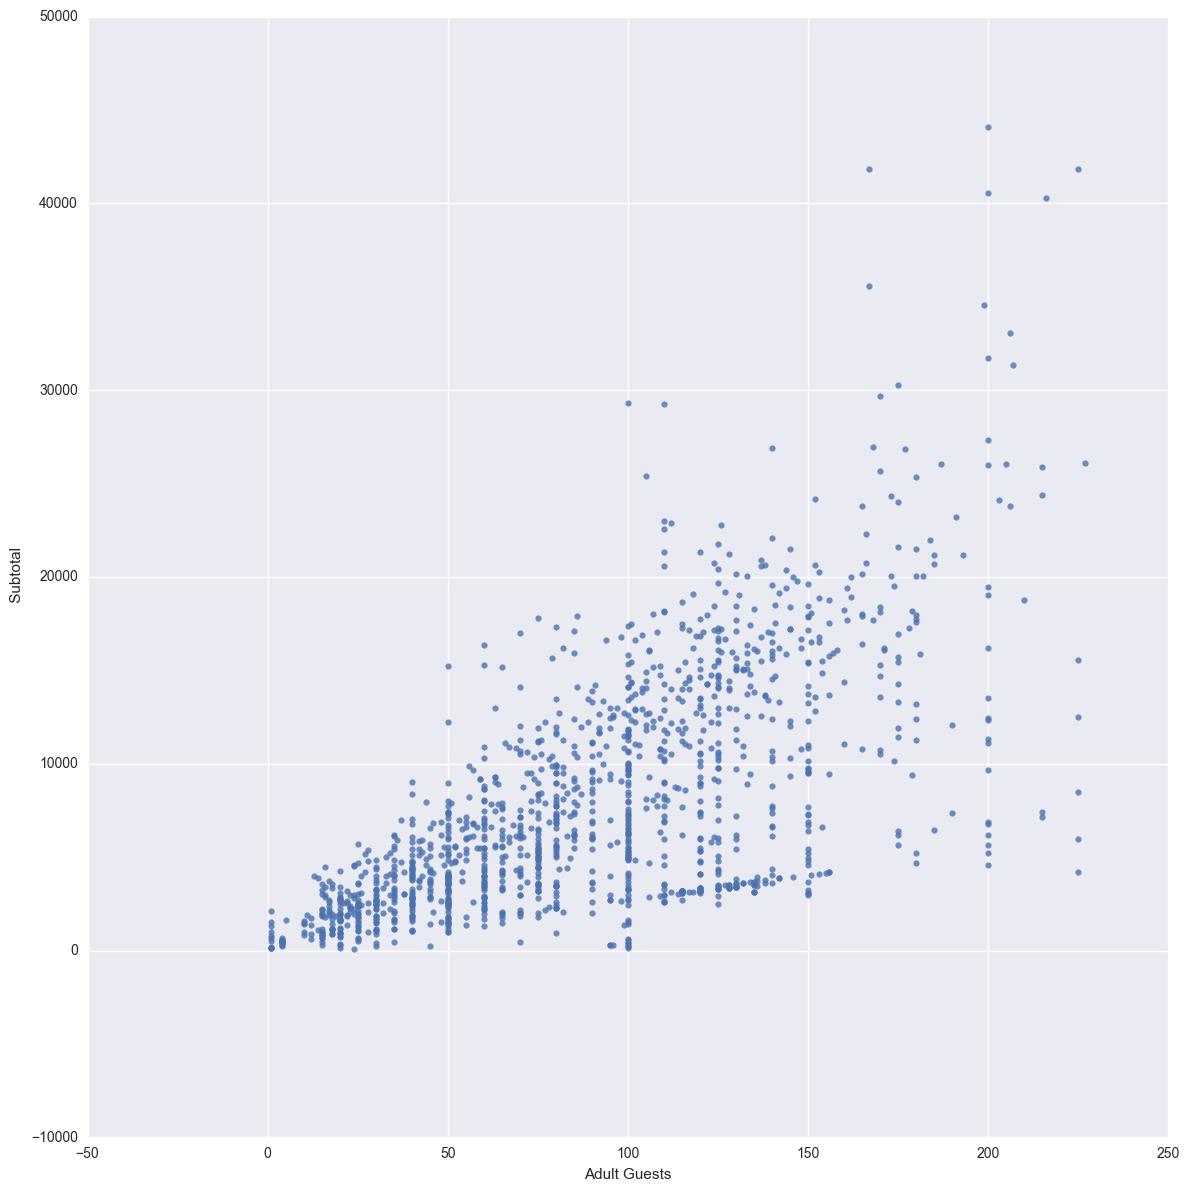

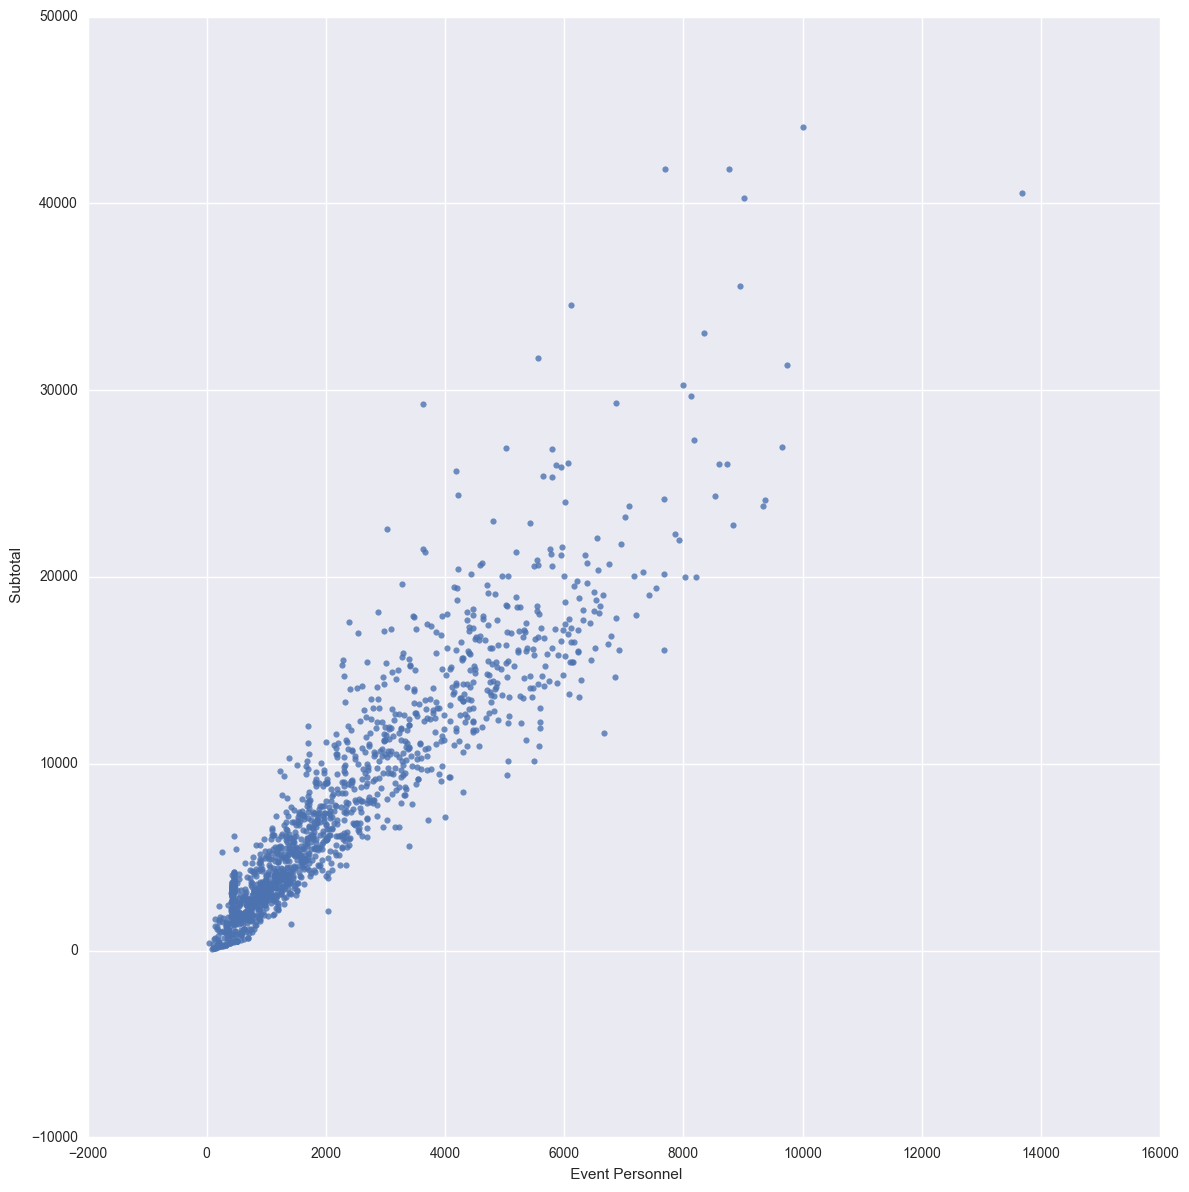

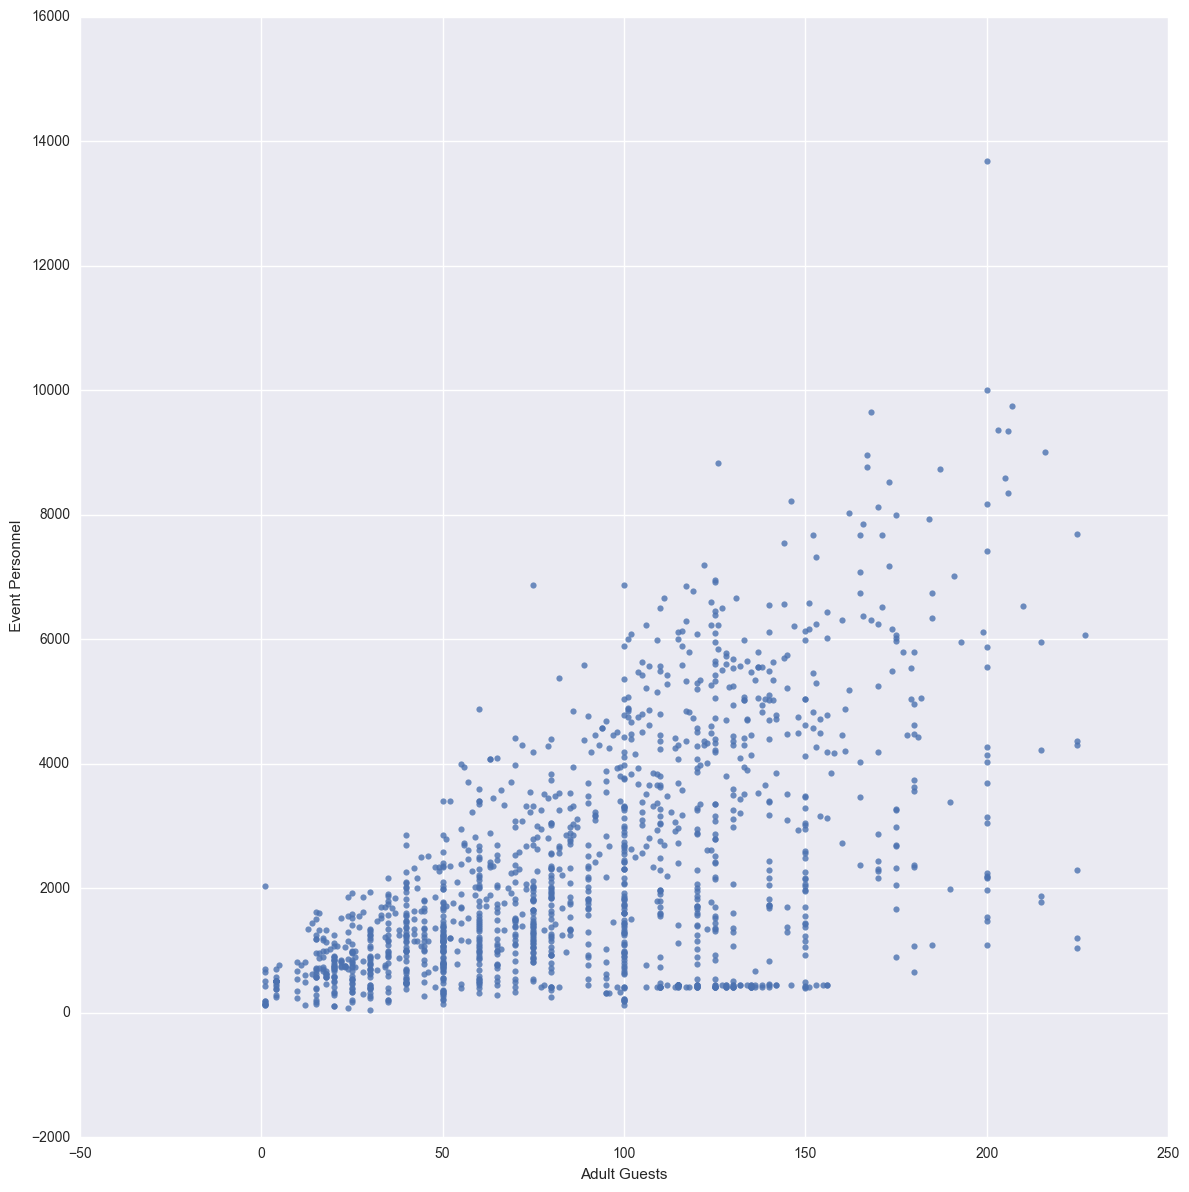

In [88]:
sns.lmplot("Adult Guests", ' Subtotal', data=df_rev_guestrange, size=12, fit_reg = False)
sns.lmplot(" Event Personnel", ' Subtotal', data=df_rev_guestrange, size=12, fit_reg = False)
sns.lmplot("Adult Guests", ' Event Personnel', data=df_rev_guestrange, size=12, fit_reg = False)

The three plot show that there may be a relation between the Total, the money spent on Event Personnel and the number of guests.

We are going to perform linear regression to determine wether there is a relationship or not. This approach also lets us see how well our model fits with the data.

In [89]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf
df_rev_guestrange.rename(columns={' Subtotal':'Subtotal', ' Event Personnel': 'HirePersonnel', 'Adult Guests': 'Guests'}, inplace=True)

# create a fitted model in one line
lm = smf.ols(formula='Subtotal ~ Guests', data=df_rev_guestrange).fit()

# print the coefficients
lm.params

Intercept    145.593974
Guests        88.301248
dtype: float64

The coefficient obtained above indicates that for every unit increase in guests there is a $88.3 dollar increase in total money made.

Next we are going to look at the P-Values and R-Squared values to determine the fit of our model and wether our hypothesis holds.

In [90]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Subtotal   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     1184.
Date:                Fri, 19 May 2017   Prob (F-statistic):          5.21e-189
Time:                        09:29:12   Log-Likelihood:                -13987.
No. Observations:                1416   AIC:                         2.798e+04
Df Residuals:                    1414   BIC:                         2.799e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    145.5940    259.179      0.562      0.574      -362.823   654.011
Guests        88.3012      2.566     34.409      0.000        83.267    93.335
==============================================================================
Omnibus:                      180.916   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              622.023
Skew:                           0.608   Prob(JB):                    8.50e-136
Kurtosis:                       6.010   Cond. No.                         209.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above summary we can see that the R-Squared value is low. Our obtained P value for the guests is <0.05 which leads us to believe that there is infact a relation between the number of guests and the total money made from the event.

Next we are going to perform a similar regression on the money spend on event personnel.

In [91]:
lm2 = smf.ols(formula='Subtotal ~ HirePersonnel', data=df_rev_guestrange).fit()

# print the coefficients
lm2.params

Intercept        850.167389
HirePersonnel      3.067886
dtype: float64

The coefficient obtained above indicates that for every unit increase in the moeny spend on personnel there is a $3.06 increase in total money made.

Next we are going to look at the P-Values and R-Squared values to determine the fit of our model and wether our hypothesis holds.

In [92]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Subtotal   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     7691.
Date:                Fri, 19 May 2017   Prob (F-statistic):               0.00
Time:                        09:29:12   Log-Likelihood:                -13100.
No. Observations:                1416   AIC:                         2.620e+04
Df Residuals:                    1414   BIC:                         2.621e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       850.1674    105.091      8.090      0.000       644.017  1056.318
HirePersonnel     3.0679      0.035     87.700      0.000         2.999     3.137
==============================================================================
Omnibus:                      543.229   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4052.901
Skew:                           1.594   Prob(JB):                         0.00
Kurtosis:                      10.651   Cond. No.                     4.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above summary we can see that the R-Squared value is pretty high. Our obtained P value for the personnel spending is <0.05 which leads us to believe that there is infact a relation between the money spent on personnel and the total money made from the event.
The high R value compared to the previous test indicates that this model fits better with our data.

In following cells we calculate a linear fit line to show the above obtained relations. We use our model to predict this line.

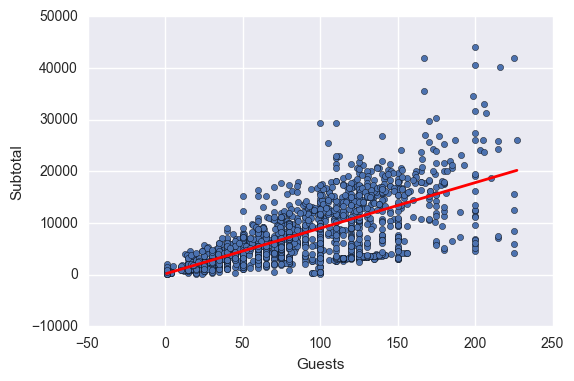

In [93]:
X_new = pd.DataFrame({'Guests': [df_rev_guestrange.Guests.min(), df_rev_guestrange.Guests.max()]})
X_new.head()
preds = lm.predict(X_new)
preds
# first, plot the observed data
df_rev_guestrange.plot(kind='scatter', x='Guests', y='Subtotal')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

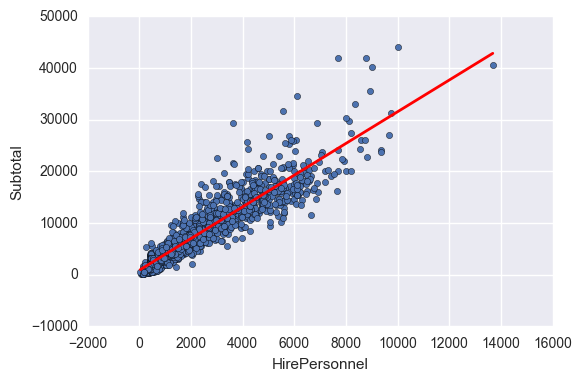

In [94]:
X_new2 = pd.DataFrame({'HirePersonnel': [df_rev_guestrange.HirePersonnel.min(), df_rev_guestrange.HirePersonnel.max()]})
X_new2.head()
preds2 = lm2.predict(X_new2)
preds2
# first, plot the observed data
df_rev_guestrange.plot(kind='scatter', x='HirePersonnel', y='Subtotal')

# then, plot the least squares line
plt.plot(X_new2, preds2, c='red', linewidth=2)


# Multiple Linear Regression

Several features can be used together in this technique to see how they together effect the total money made from an event. In the following model we will use the number of guests and the amount spent on personnel together to determine their effects on the total money made from an event.

In [95]:
lm3 = smf.ols(formula='Subtotal ~ Guests + HirePersonnel', data=df_rev_guestrange).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Subtotal   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     4831.
Date:                Fri, 19 May 2017   Prob (F-statistic):               0.00
Time:                        09:29:13   Log-Likelihood:                -12960.
No. Observations:                1416   AIC:                         2.593e+04
Df Residuals:                    1413   BIC:                         2.594e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      -594.1900    125.999     -4.716      0.000      -841.355  -347.025
Guests           26.9215      1.537     17.520      0.000        23.907    29.936
HirePersonnel     2.6639      0.039     67.934      0.000         2.587     2.741
==============================================================================
Omnibus:                      574.569   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6073.633
Skew:                           1.587   Prob(JB):                         0.00
Kurtosis:                      12.637   Cond. No.                     6.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The above result has an even higher R-Squared value than obtained in the other models indicating that this model fits our data best. It shows that the number of guests and money spent on event personnel are both positively associated with the total money made from an event. Their low P-Values allow us to reject the null hypothesis. (That there is no relation between these features and the total money made.)

# Conclusion

This tutorial serves as a guide to touch upon the following topics using a real life example:

* Data Scraping 
* Data Manipulation 
* Data Processing 
* Obtaining Metrics 
* Hypothesis Testing 
* Data Visualization 